In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
!pip install nltk

In [3]:
import nltk
nltk.download('punkt')

nltk.download('stopwords')
nltk.download('wordnet')

nltk.download('omw-1.4')

from nltk.stem import PorterStemmer, WordNetLemmatizer
from nltk.corpus import stopwords

import re

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


In [4]:
review = pd.read_csv('/content/reviews.csv')
review = review.Details

In [5]:
reviews = [Details for Details in review  if Details ]
reviews[0:]

['GoodREAD MORE',
 'Fabulous 👌👌READ MORE',
 'AWESOME. TVREAD MORE',
 'This 32" 80cm 1+ Y1s 2022 model Led tv is worth of money just simply buy it without any doubt. Dolby Sound, Display and apps accessibility are top notch.READ MORE',
 'Good buy from OnePlus,the picture quality is better than i expected...READ MORE',
 'Good tv picture quality superREAD MORE',
 'Value of money 💰READ MORE',
 'Excellent product and best quality thanks Flipkart and OnePlusREAD MORE',
 'Verry good product, awesome picture quality ya1s is betterREAD MORE',
 'Good product in this priceREAD MORE',
 "Value for money, A great purchase with OnePlus, Picture quality is so good as expected, Sound is awesome, It's like a small home theatre at home. Recommended for purchase 👍READ MORE",
 'Picture quality awesome. Gates looking,Connectivity ok .5/5 picture quality5/5 sound quality5/5 connectivityREAD MORE',
 'Good  product  sound ok  quality  super  1 plus❤❤READ MORE',
 'Everything very good picture qualityREAD MORE',

In [6]:
len(reviews)

280

In [7]:
filter = [item for item in reviews if not isinstance(item, float)]

In [8]:
reviews_text = ' '.join(filter)

In [9]:
reviews_text

'GoodREAD MORE Fabulous 👌👌READ MORE AWESOME. TVREAD MORE This 32" 80cm 1+ Y1s 2022 model Led tv is worth of money just simply buy it without any doubt. Dolby Sound, Display and apps accessibility are top notch.READ MORE Good buy from OnePlus,the picture quality is better than i expected...READ MORE Good tv picture quality superREAD MORE Value of money 💰READ MORE Excellent product and best quality thanks Flipkart and OnePlusREAD MORE Verry good product, awesome picture quality ya1s is betterREAD MORE Good product in this priceREAD MORE Value for money, A great purchase with OnePlus, Picture quality is so good as expected, Sound is awesome, It\'s like a small home theatre at home. Recommended for purchase 👍READ MORE Picture quality awesome. Gates looking,Connectivity ok .5/5 picture quality5/5 sound quality5/5 connectivityREAD MORE Good  product  sound ok  quality  super  1 plus❤❤READ MORE Everything very good picture qualityREAD MORE Great picture quality and average sound quality in th

In [10]:
sent = nltk.sent_tokenize(reviews_text)

In [11]:
len(sent)

92

In [12]:
sent[3]

'Recommended for purchase 👍READ MORE Picture quality awesome.'

In [13]:
corpus = [ ]

for i in range(len(sent)):
  txt = re.sub('[^a-zA-z]', ' ', sent[i])
  txt = txt.lower()
  corpus.append(txt)

In [14]:
corpus

['goodread more fabulous   read more awesome ',
 'tvread more this       cm    y s      model led tv is worth of money just simply buy it without any doubt ',
 'dolby sound  display and apps accessibility are top notch read more good buy from oneplus the picture quality is better than i expected   read more good tv picture quality superread more value of money  read more excellent product and best quality thanks flipkart and oneplusread more verry good product  awesome picture quality ya s is betterread more good product in this priceread more value for money  a great purchase with oneplus  picture quality is so good as expected  sound is awesome  it s like a small home theatre at home ',
 'recommended for purchase  read more picture quality awesome ',
 'gates looking connectivity ok      picture quality    sound quality    connectivityread more good  product  sound ok  quality  super    plus  read more everything very good picture qualityread more great picture quality and average sou

In [15]:
# stemming

stemmer = PorterStemmer()

In [16]:
for i in corpus:
  words = nltk.word_tokenize(i)
  print(words)

['goodread', 'more', 'fabulous', 'read', 'more', 'awesome']
['tvread', 'more', 'this', 'cm', 'y', 's', 'model', 'led', 'tv', 'is', 'worth', 'of', 'money', 'just', 'simply', 'buy', 'it', 'without', 'any', 'doubt']
['dolby', 'sound', 'display', 'and', 'apps', 'accessibility', 'are', 'top', 'notch', 'read', 'more', 'good', 'buy', 'from', 'oneplus', 'the', 'picture', 'quality', 'is', 'better', 'than', 'i', 'expected', 'read', 'more', 'good', 'tv', 'picture', 'quality', 'superread', 'more', 'value', 'of', 'money', 'read', 'more', 'excellent', 'product', 'and', 'best', 'quality', 'thanks', 'flipkart', 'and', 'oneplusread', 'more', 'verry', 'good', 'product', 'awesome', 'picture', 'quality', 'ya', 's', 'is', 'betterread', 'more', 'good', 'product', 'in', 'this', 'priceread', 'more', 'value', 'for', 'money', 'a', 'great', 'purchase', 'with', 'oneplus', 'picture', 'quality', 'is', 'so', 'good', 'as', 'expected', 'sound', 'is', 'awesome', 'it', 's', 'like', 'a', 'small', 'home', 'theatre', 'at',

In [17]:
for i in corpus:
  words = nltk.word_tokenize(i)
  for i in words:
    if i not in set(stopwords.words('english')):
      print(stemmer.stem(i))

goodread
fabul
read
awesom
tvread
cm
model
led
tv
worth
money
simpli
buy
without
doubt
dolbi
sound
display
app
access
top
notch
read
good
buy
oneplu
pictur
qualiti
better
expect
read
good
tv
pictur
qualiti
superread
valu
money
read
excel
product
best
qualiti
thank
flipkart
oneplusread
verri
good
product
awesom
pictur
qualiti
ya
betterread
good
product
priceread
valu
money
great
purchas
oneplu
pictur
qualiti
good
expect
sound
awesom
like
small
home
theatr
home
recommend
purchas
read
pictur
qualiti
awesom
gate
look
connect
ok
pictur
qualiti
sound
qualiti
connectivityread
good
product
sound
ok
qualiti
super
plu
read
everyth
good
pictur
qualityread
great
pictur
qualiti
averag
sound
qualiti
price
rang
issu
connect
chrome
cast
oneplu
connect
ad
advantag
first
impress
worth
price
read
awesomeread
nice
oneplu
inch
tv
pictur
qualiti
osm
bestsound
good
read
superb
nice
productread
pictur
qualiti
super
good
oneplu
best
toread
nice
tv
love
punchi
coloursound
amaz
segmentgo
itpleas
buy
itnon
compet

In [18]:
# Lemmatization

lemma = WordNetLemmatizer()

In [19]:
for i in corpus:
  words = nltk.word_tokenize(i)
  for i in words:
    if i not in set(stopwords.words('english')):
      print(lemma.lemmatize(i))

goodread
fabulous
read
awesome
tvread
cm
model
led
tv
worth
money
simply
buy
without
doubt
dolby
sound
display
apps
accessibility
top
notch
read
good
buy
oneplus
picture
quality
better
expected
read
good
tv
picture
quality
superread
value
money
read
excellent
product
best
quality
thanks
flipkart
oneplusread
verry
good
product
awesome
picture
quality
ya
betterread
good
product
priceread
value
money
great
purchase
oneplus
picture
quality
good
expected
sound
awesome
like
small
home
theatre
home
recommended
purchase
read
picture
quality
awesome
gate
looking
connectivity
ok
picture
quality
sound
quality
connectivityread
good
product
sound
ok
quality
super
plus
read
everything
good
picture
qualityread
great
picture
quality
average
sound
quality
price
range
issue
connectivity
chrome
cast
oneplus
connect
added
advantage
first
impression
worth
price
read
awesomeread
nice
oneplus
inch
tv
picture
quality
osm
bestsound
good
read
superb
nice
productread
picture
quality
super
good
oneplus
best
torea

Feature Extraction

In [20]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

In [21]:
cv = CountVectorizer()

x = cv.fit_transform(corpus)
cv.vocabulary_

{'goodread': 225,
 'more': 336,
 'fabulous': 184,
 'read': 447,
 'awesome': 43,
 'tvread': 587,
 'this': 565,
 'cm': 106,
 'model': 325,
 'led': 292,
 'tv': 586,
 'is': 267,
 'worth': 642,
 'of': 366,
 'money': 329,
 'just': 279,
 'simply': 500,
 'buy': 86,
 'it': 270,
 'without': 634,
 'any': 26,
 'doubt': 160,
 'dolby': 157,
 'sound': 515,
 'display': 153,
 'and': 22,
 'apps': 32,
 'accessibility': 2,
 'are': 34,
 'top': 577,
 'notch': 362,
 'good': 223,
 'from': 212,
 'oneplus': 373,
 'the': 554,
 'picture': 404,
 'quality': 433,
 'better': 61,
 'than': 549,
 'expected': 179,
 'superread': 533,
 'value': 608,
 'excellent': 177,
 'product': 421,
 'best': 58,
 'thanks': 551,
 'flipkart': 205,
 'oneplusread': 374,
 'verry': 611,
 'ya': 648,
 'betterread': 62,
 'in': 260,
 'priceread': 417,
 'for': 208,
 'great': 228,
 'purchase': 431,
 'with': 632,
 'so': 509,
 'as': 36,
 'like': 297,
 'small': 506,
 'home': 251,
 'theatre': 556,
 'at': 38,
 'recommended': 454,
 'gates': 217,
 'looking

In [22]:
x[0].toarray()

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

In [23]:
corpus[0]

'goodread more fabulous   read more awesome '

In [24]:
# convert into DataFrame,DTM = document term matrix

x = pd.DataFrame(x.toarray(), columns = cv.get_feature_names_out())
x

,about,above,accessibility,according,across,actually,added,advantage,after,again,...,ya,yearread,years,yes,yesterday,you,your,youread,youtube,yr
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,1,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
88,0,0,0,0,0,0,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
89,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
90,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


TF - IDF

In [25]:
tf = TfidfVectorizer()
x = tf.fit_transform(corpus)

In [26]:
x.toarray()

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.13335444, ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [27]:
#convert array to data frame

x = pd.DataFrame(x.toarray(), columns = tf.get_feature_names_out())
x

,about,above,accessibility,according,across,actually,added,advantage,after,again,...,ya,yearread,years,yes,yesterday,you,your,youread,youtube,yr
0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.133354,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,...,0.133354,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
88,0.0,0.0,0.000000,0.0,0.0,0.0,0.138973,0.0,0.0,0.117248,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
89,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
90,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [28]:
x.shape

(92, 658)

In [29]:
tf.get_feature_names_out()

array(['about', 'above', 'accessibility', 'according', 'across',
       'actually', 'added', 'advantage', 'after', 'again', 'agent',
       'agin', 'ago', 'all', 'along', 'also', 'although', 'always', 'am',
       'amazing', 'amazingread', 'an', 'and', 'android', 'angle',
       'another', 'any', 'anymore', 'anyone', 'anything', 'aowsome',
       'app', 'apps', 'arc', 'are', 'arrenge', 'as', 'asusual', 'at',
       'atmos', 'audio', 'august', 'average', 'awesome', 'awesomeread',
       'awsome', 'back', 'background', 'bad', 'baseless', 'bass', 'bbd',
       'be', 'beautiful', 'because', 'been', 'before', 'behaviour',
       'best', 'bestread', 'bestsound', 'better', 'betterread', 'bezel',
       'big', 'billion', 'bit', 'black', 'blessing', 'blindly', 'blowing',
       'blown', 'bluetooth', 'boot', 'both', 'bought', 'brand', 'branded',
       'brands', 'brings', 'brought', 'budget', 'budgetread', 'build',
       'bumper', 'but', 'buy', 'buying', 'buyread', 'by', 'came', 'can',
       '

In [30]:
len(tf.get_feature_names_out())

658

NER and Word Cloud



In [31]:
!pip install -U spacy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.7/6.7 MB 19.3 MB/s eta 0:00:00
  Attempting uninstall: spacy
    Found existing installation: spacy 3.5.4
    Uninstalling spacy-3.5.4:
      Successfully uninstalled spacy-3.5.4
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
en-core-web-sm 3.5.0 requires spacy<3.6.0,>=3.5.0, but you have spacy 3.6.0 which is incompatible.


In [ ]:
!python -m spacy download en_core_web_sm

In [33]:
import spacy
from spacy import displacy


In [39]:
corpus1 = [ ]

for i in range(len(sent)):
  txt = re.sub('[^a-zA-z]', '  ', sent[i])
  txt = txt.lower()
  corpus1.append(txt)

In [40]:
txt = corpus1
txt

['goodread  more  fabulous      read  more  awesome  ',
 'tvread  more  this              cm        y  s            model  led  tv  is  worth  of  money  just  simply  buy  it  without  any  doubt  ',
 'dolby  sound    display  and  apps  accessibility  are  top  notch  read  more  good  buy  from  oneplus  the  picture  quality  is  better  than  i  expected      read  more  good  tv  picture  quality  superread  more  value  of  money    read  more  excellent  product  and  best  quality  thanks  flipkart  and  oneplusread  more  verry  good  product    awesome  picture  quality  ya  s  is  betterread  more  good  product  in  this  priceread  more  value  for  money    a  great  purchase  with  oneplus    picture  quality  is  so  good  as  expected    sound  is  awesome    it  s  like  a  small  home  theatre  at  home  ',
 'recommended  for  purchase    read  more  picture  quality  awesome  ',
 'gates  looking  connectivity  ok            picture  quality        sound  quality   

In [36]:
nlp = spacy.load('en_core_web_sm')


In [ ]:
x = nlp(reviews_text)
x

In [51]:
import re

def remove_emojis(text):
    # Emojis are typically represented by Unicode characters, so we use a regex pattern to match them
    emoji_pattern = re.compile("["
                               u"\U0001F600-\U0001F64F"  # emoticons
                               u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                               u"\U0001F680-\U0001F6FF"  # transport & map symbols
                               u"\U0001F700-\U0001F77F"  # alchemical symbols
                               u"\U0001F780-\U0001F7FF"  # Geometric Shapes Extended
                               u"\U0001F800-\U0001F8FF"  # Supplemental Arrows-C
                               u"\U0001F900-\U0001F9FF"  # Supplemental Symbols and Pictographs
                               u"\U0001FA00-\U0001FA6F"  # Chess Symbols
                               u"\U0001FA70-\U0001FAFF"  # Symbols and Pictographs Extended-A
                               u"\U00002702-\U000027B0"  # Dingbats
                               u"\U000024C2-\U0001F251"
                               "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', text)

# Example usage:
x = reviews_text
clean_text = remove_emojis(x)
print(clean_text)  # Output: "Hello! How are you?"



GoodREAD MORE Fabulous READ MORE AWESOME. TVREAD MORE This 32" 80cm 1+ Y1s 2022 model Led tv is worth of money just simply buy it without any doubt. Dolby Sound, Display and apps accessibility are top notch.READ MORE Good buy from OnePlus,the picture quality is better than i expected...READ MORE Good tv picture quality superREAD MORE Value of money READ MORE Excellent product and best quality thanks Flipkart and OnePlusREAD MORE Verry good product, awesome picture quality ya1s is betterREAD MORE Good product in this priceREAD MORE Value for money, A great purchase with OnePlus, Picture quality is so good as expected, Sound is awesome, It's like a small home theatre at home. Recommended for purchase READ MORE Picture quality awesome. Gates looking,Connectivity ok .5/5 picture quality5/5 sound quality5/5 connectivityREAD MORE Good  product  sound ok  quality  super  1 plusREAD MORE Everything very good picture qualityREAD MORE Great picture quality and average sound quality in this price

In [53]:
x = nlp(clean_text)

In [ ]:
x

In [55]:
displacy.render(x, style='ent', jupyter=True)

In [57]:
for i in x:
  print(i, i.pos_) #parts of speech

GoodREAD PROPN
MORE ADV
Fabulous ADJ
READ NOUN
MORE ADJ
AWESOME PROPN
. PUNCT
TVREAD VERB
MORE ADV
This DET
32 NUM
" PUNCT
80 NUM
cm NOUN
1 NUM
+ NUM
Y1s PROPN
2022 NUM
model NOUN
Led PROPN
tv PROPN
is AUX
worth ADJ
of ADP
money NOUN
just ADV
simply ADV
buy VERB
it PRON
without ADP
any DET
doubt NOUN
. PUNCT
Dolby PROPN
Sound PROPN
, PUNCT
Display NOUN
and CCONJ
apps VERB
accessibility NOUN
are AUX
top ADJ
notch NOUN
. PUNCT
READ VERB
MORE ADJ
Good ADJ
buy NOUN
from ADP
OnePlus PROPN
, PUNCT
the DET
picture NOUN
quality NOUN
is AUX
better ADJ
than SCONJ
i PRON
expected VERB
... PUNCT
READ VERB
MORE ADJ
Good ADJ
tv NOUN
picture NOUN
quality NOUN
superREAD NOUN
MORE ADJ
Value NOUN
of ADP
money NOUN
READ VERB
MORE ADJ
Excellent ADJ
product NOUN
and CCONJ
best ADJ
quality NOUN
thanks NOUN
Flipkart PROPN
and CCONJ
OnePlusREAD ADJ
MORE ADV
Verry VERB
good ADJ
product NOUN
, PUNCT
awesome ADJ
picture NOUN
quality NOUN
ya1s PROPN
is AUX
betterREAD NOUN
MORE ADJ
Good ADJ
product NOUN
in ADP
thi

word cloud

In [58]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt


In [59]:
stop = STOPWORDS

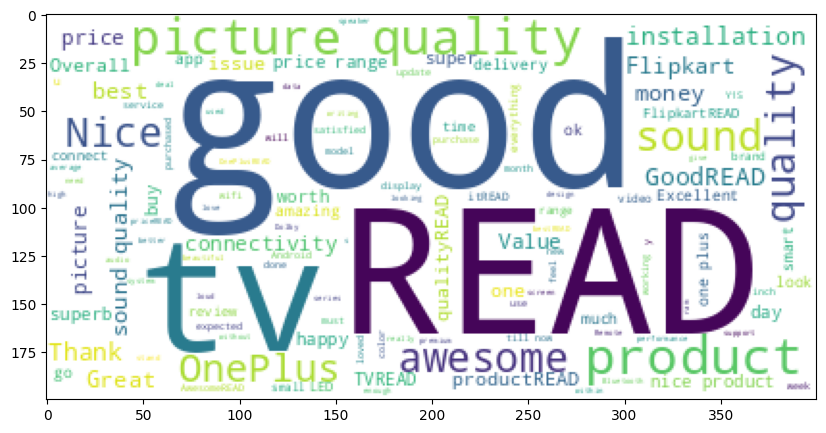

In [63]:
wc = WordCloud(background_color='white',stopwords=stop).generate(clean_text)
plt.figure(figsize=(10,5))
plt.imshow(wc)